In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
 data = pd.read_csv(r'C:\Users\banga\OneDrive\Desktop\Internship\DATA SETS\Furniture Data.csv')

In [3]:
data.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [4]:
data.shape

(2000, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [6]:
data.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [7]:
#dropping the column"originalPriCe" as it contains more null values
data.drop(['originalPrice'],axis=1,inplace=True)

In [8]:
#Removing the '$'symbol to convert price column to numerical data
data['price'] = data['price'].replace('[\$,]','',regex=True).astype(float)

In [9]:
data.describe()

,price,sold
count,2000.000000,2000.000000
mean,156.560020,23.493500
std,176.936735,254.094061
min,0.990000,0.000000
25%,48.530000,1.000000
50%,114.080000,3.000000
75%,193.490000,9.000000
max,2876.380000,10000.000000


In [10]:
data['price'].describe()

count    2000.000000
mean      156.560020
std       176.936735
min         0.990000
25%        48.530000
50%       114.080000
75%       193.490000
max      2876.380000
Name: price, dtype: float64

In [11]:
#Most expensive product
high_expense= data['price'].idxmax()
top_expensive_product=data.loc[high_expense]
print(top_expensive_product)

productTitle    Luxury Modern Tight Curved Back Velvet Sofa,Mi...
price                                                     2876.38
sold                                                            0
tagText                                             Free shipping
Name: 656, dtype: object


In [12]:
#Least expensive product
low_expense= data['price'].idxmin()
least_expensive_product=data.loc[low_expense]
print(least_expensive_product)

productTitle    1PC Mini House Night Table Model Wooden Mini B...
price                                                        0.99
sold                                                            7
tagText                                             Free shipping
Name: 597, dtype: object


<Axes: xlabel='price', ylabel='Density'>

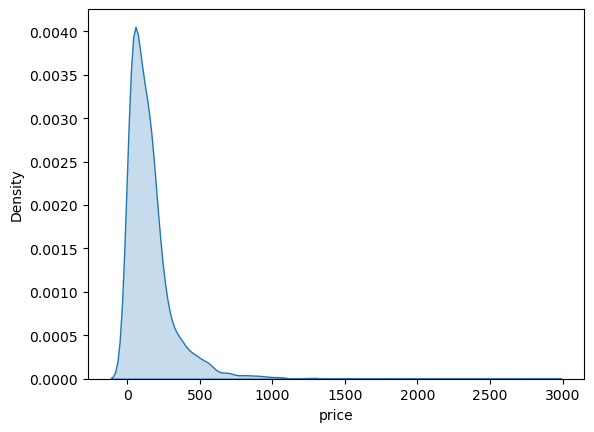

In [13]:
sb.kdeplot(data=data,x='price',fill=True)

<Axes: xlabel='sold', ylabel='Density'>

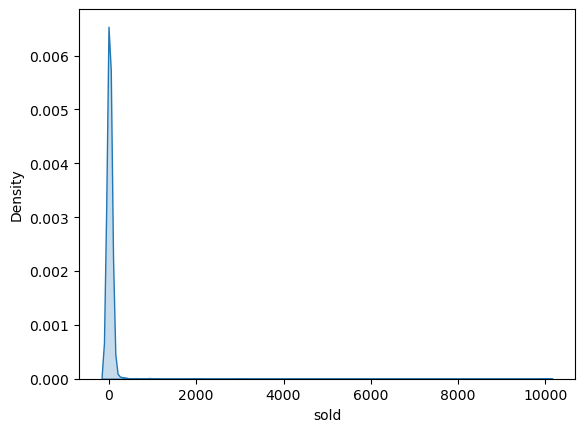

In [14]:
sb.kdeplot(x='sold',data=data,fill=True)

In [15]:
data['tagText'].value_counts()

tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64

In [16]:
data['tagText'] = data['tagText'].apply(lambda x:x if x in['Free shipping'] else 'others')
data['tagText'].value_counts()

tagText
Free shipping    1880
others            120
Name: count, dtype: int64

<Axes: xlabel='tagText', ylabel='count'>

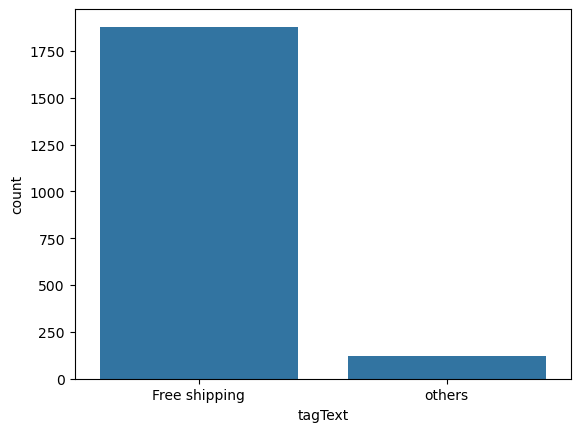

In [17]:
sb.countplot(x='tagText',data=data)

In [18]:
data['sold'].value_counts()

sold
0       451
1       319
2       196
3       132
4        95
       ... 
134       1
110       1
251       1
2000      1
133       1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='sold', ylabel='price'>

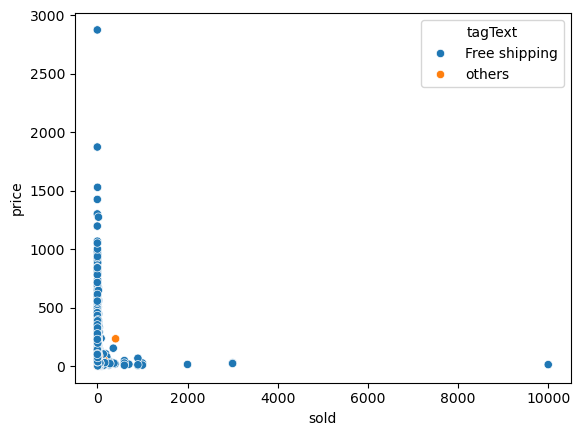

In [19]:
sb.scatterplot(x='sold',y='price',data=data,hue='tagText')

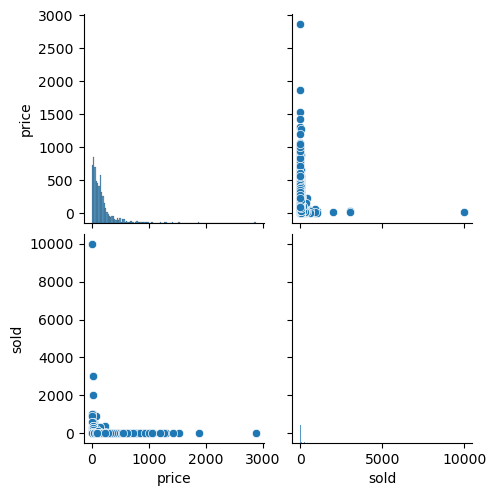

In [20]:
sb.pairplot(data[['price','sold']])

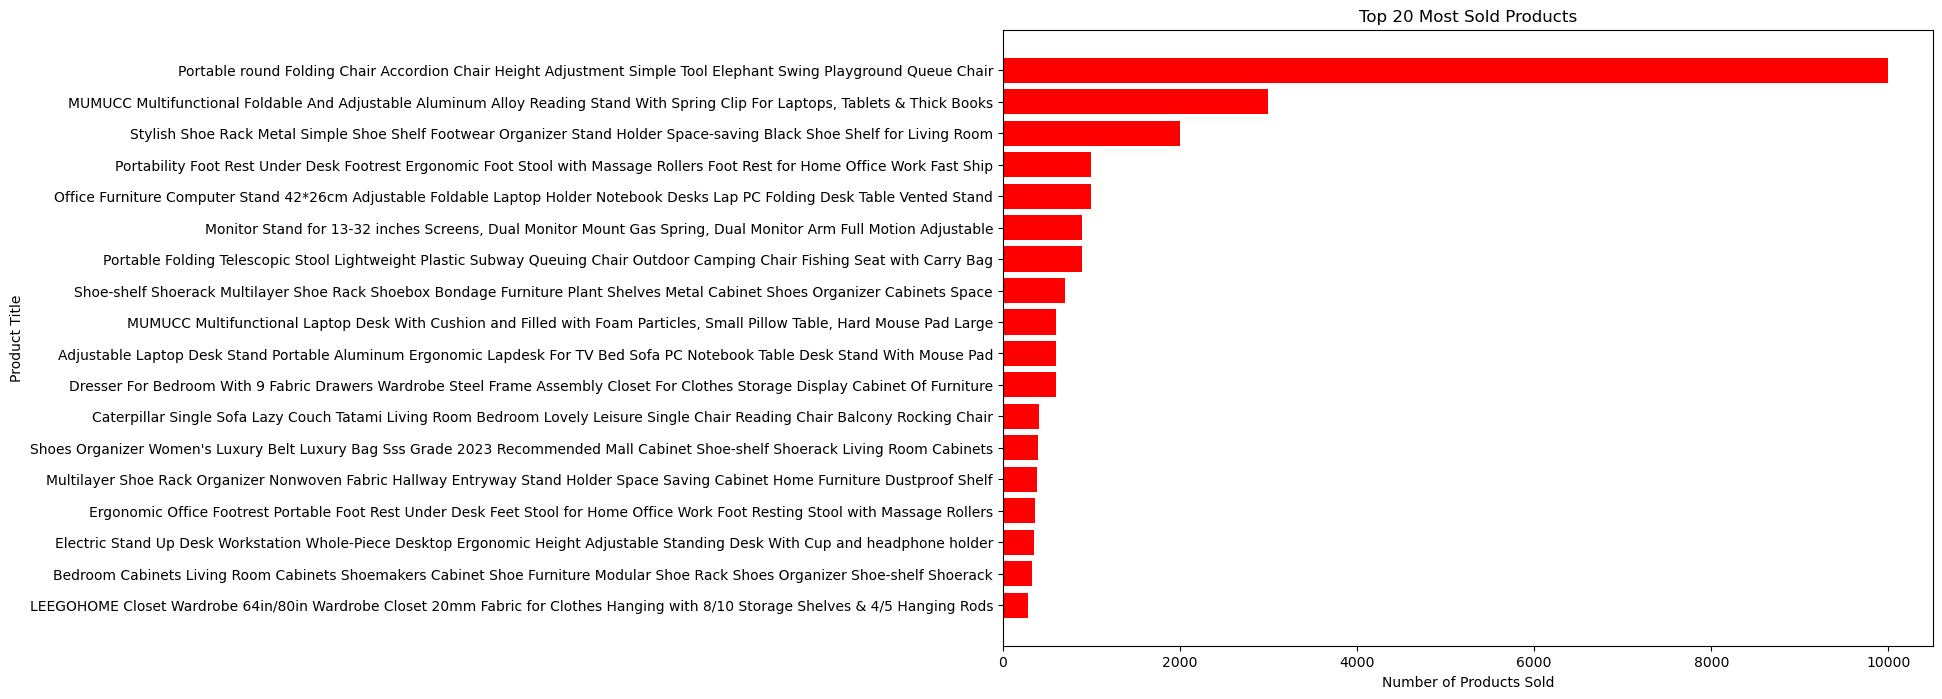

In [37]:
# Select top 20 most sold products
top_20_sold = data.sort_values(by='sold', ascending=False).head(20)

# Plot using a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_sold['productTitle'], top_20_sold['sold'], color='red')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Title')
plt.title('Top 20 Most Sold Products')
plt.gca().invert_yaxis()
plt.show()

#### The above plot shows that "Portable round folding chair" is the most sold product.

### Now lets build a small Recommendation system. Say, a new user logs in, the system asks them the budget and based on the budget entered by the user and the number of units sold, the system should recommend 10 furniture products to the customer.

In [22]:
def recommend_products(budget):
    # Filter products within the budget
    affordable_products = data[data['price'] <= budget]
    
    # Sort the affordable products by the number of units sold in descending order
    top_products = affordable_products.sort_values(by='sold', ascending=False).head(10)
    
    return top_products[['productTitle', 'price', 'sold']]

In [26]:
#By using this line you can enter the budget of your choice and press 'enter' button
budget = float(input("Please enter your budget: "))

Please enter your budget:  45


In [27]:
recommendations = recommend_products(budget)
print("n\Top 10 recommended products within your budget:")
print(recommendations)

n\Top 10 recommended products within your budget:
                                           productTitle  price   sold
1008  Portable round Folding Chair Accordion Chair H...  12.28  10000
1391  MUMUCC Multifunctional Foldable And Adjustable...  21.94   3000
696   MUMUCC Multifunctional Foldable And Adjustable...  26.11   3000
1021  Stylish Shoe Rack Metal Simple Shoe Shelf Foot...  13.64   2000
1174  Portability Foot Rest Under Desk Footrest Ergo...   8.04   1000
22    Office Furniture Computer Stand 42*26cm Adjust...  26.03   1000
1511  Portable Folding Telescopic Stool Lightweight ...  11.20    900
693   Portability Foot Rest Under Desk Footrest Ergo...   5.00    900
494   Shoe-shelf Shoerack Multilayer Shoe Rack Shoeb...  15.40    700
1546  Adjustable Laptop Desk Stand Portable Aluminum...  25.49    600


In [28]:
def recommended_products(min_budget, max_budget):
    # Filter products within the budget range
    affordable_products = data[(data['price'] >= min_budget) & (data['price'] <= max_budget)]
    
    # Sort the affordable products by the number of units sold in descending order
    top_products = affordable_products.sort_values(by='sold', ascending=False).head(10)
    
    return top_products[['productTitle', 'price', 'sold']]

In [29]:
#By using this line you can enter the minimum budget of your choice and press 'enter' button
min_budget = int(input("Please enter your minimum budget: "))

Please enter your minimum budget:  155


In [30]:
#By using this line you can enter the maximum budget of your choice and press 'enter' button
max_budget = int(input("Please enter your maximum budget: "))

Please enter your maximum budget:  255


In [31]:
top_recommendations = recommended_products(min_budget, max_budget)
print("\nTop 10 Recommended Products within your budget range:")
print(top_recommendations)


Top 10 Recommended Products within your budget range:
                                           productTitle   price  sold
863   Caterpillar Single Sofa Lazy Couch Tatami Livi...  233.46   405
1181  Luxury Living Room Sofa Furgle Chair Soft Sued...  236.87    84
959   Dresser for Bedroom With 8 Drawer Dressing Tab...  187.88    34
905   55 Inch Convertible Sleeper Sofa 3 in 1 Velvet...  209.11    34
729   3 in 1 Sleeper Sofa Couch Bed with USB & Type ...  223.85    30
99    Air Dresser LED White Vanity Set With Stool an...  200.12    28
1343  Nordic Style Single Rocking Chair Lazy Sofa Ba...  216.31    25
1726  Queen/Full Size Industrial Bed Frame Noise Fre...  172.54    25
1777  Twin Size Bed Frame with LED Lights and Chargi...  241.20    22
448   Foldable Lounger Bed Convertible Sofa Water-Re...  195.95    21
